In [7]:
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd
import numpy as np
import plotly.express as px
import streamlit as st
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [45]:
raw_data = pd.read_csv("./moneda.csv")

In [47]:
data = raw_data.drop(['Fecha'], axis=1) 
raw_data.dropna(inplace=True)
raw_data.insert(loc=0, column='date', value=pd.to_datetime(raw_data.index, dayfirst=True)) 
raw_data['index'] = range(1, len(raw_data) + 1)
raw_data = raw_data.set_index('index')

In [48]:
data.head()

,Compra,Venta,TCR 1/
0,6.14285,6.16625,NaN
1,6.17433,6.19326,NaN
2,6.17433,6.19326,NaN
3,6.17433,6.19326,NaN
4,6.16782,6.18593,NaN


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Compra  8397 non-null   float64
 1   Venta   8397 non-null   float64
 2   TCR 1/  0 non-null      float64
dtypes: float64(3)
memory usage: 197.0 KB


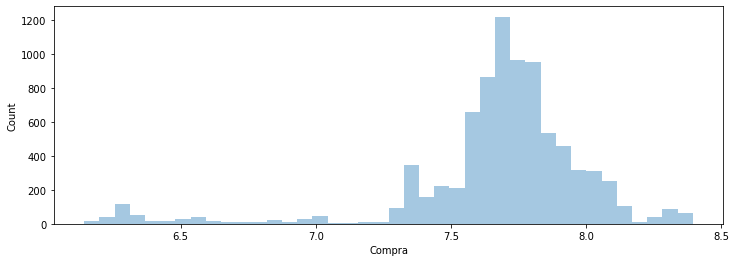

In [50]:
plt.figure(figsize=(12,4))
sns.histplot(data['Compra'], kde=False, bins=40, alpha=0.4, linewidth= 0)

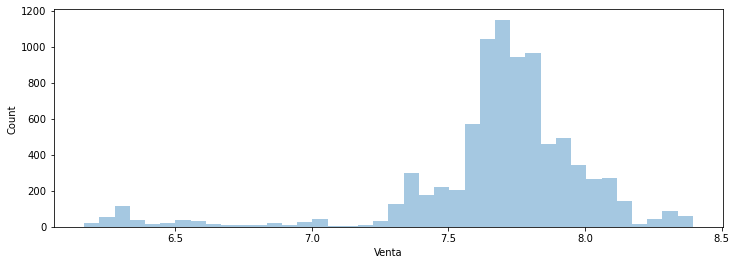

In [51]:
plt.figure(figsize=(12,4))
sns.histplot(data['Venta'], kde=False, bins=40, alpha=0.4, linewidth= 0)

2021-11-18 23:06:12.675 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


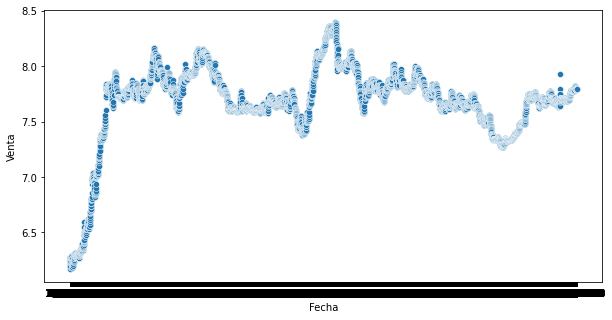

In [18]:
#ARREGLAR ESTA GRAFICA
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Fecha',y='Venta', data=data,)

Modelos

In [52]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [60]:
def exponential(x, m, t, b):
    return m * np.exp(-t * x) + b

w = widgets.Dropdown(
    options=['Exponencial', 'Logaritmico', 'Polinomico','Promedios Moviles'],
    value='Exponencial',
    description='Modelo:',
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])
        if (w.value == 'Exponencial'):
            print('expo')
            #m * np.exp(-t * x) + b
            paramsExpModel, cv = curve_fit(
                    expModel, data.index, data['TCR1'], (2000, .01, 1))
            data['expModel'] = exponential(
                    data.index, *paramsExpModel)
        if (w.value == 'Logaritmico'):
            print('loga')
        if (w.value == 'Polinomico'):
            print('poli')
        if (w.value == 'Promedios Moviles'):
            print('movil')
            

w.observe(on_change)
display(w)



Dropdown(description='Modelo:', options=('Exponencial', 'Logaritmico', 'Polinomico', 'Promedios Moviles'), val…

changed to Polinomico
poli
changed to Exponencial
expo


NameError: name 'expModel' is not defined

In [ ]:
Suavizamiento Expoencial

In [67]:
def f(x):
    return x
    

interact(f, x=10);

def exponential(x, m, t, b):
    return m * np.exp(-t * x) + b

paramsExpModel, cv = curve_fit(exponential, data.index, data['Compra'], (2000, .01, 1))
data['expModel'] = exponential(data.index, *paramsExpModel)
    


interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

ValueError: array must not contain infs or NaNs